# Urban Heat Island Analysis

## References:

- Secondary Chat with ChatGPT: https://chatgpt.com/share/d9661000-845f-4920-9332-95dec5b788be
    - Original chat can't be shared due to having uploaded images.

In [67]:
from IPython.display import display, HTML
display(HTML('''<style> </style>'''))

### 1. Business Understanding



**Objective:**
- Analyze the impact of urban heat islands (UHI) on local climate and propose mitigation strategies.

**Goals:**
- Identify and map urban heat islands in various cities.
- Analyze temperature variations between urban and rural areas.
- Correlate UHI data with socio-economic factors.
- Propose actionable mitigation strategies.

**Key Questions:**
- What are the temperature differences between urban and rural areas?
- How do socio-economic factors correlate with the intensity of UHIs?
- What mitigation strategies can reduce the impact of UHIs?

**Project Plan:**
- Define project timeline and milestones.
- Identify key stakeholders (e.g., city planners, environmental agencies).



### 2. Data Understanding



**Data Sources:**
- NASA's MODIS Land Surface Temperature (LST) data.
- Socio-economic data from public sources (e.g., census data).
- Geographic data for urban and rural delineations.

**Data Collection:**
- Download MODIS LST data for selected cities.
- Collect socio-economic data from government databases.
- Obtain geographic boundaries from GIS data sources.

**Initial Data Exploration:**
- Visualize temperature data to identify initial patterns.
- Summarize socio-economic data (e.g., income levels, population density).

**Assess Data Quality:**
- Check for missing values, inconsistencies, and data accuracy.


### MODIS LST Data
- MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061
    - [Link](https://search.earthdata.nasa.gov/search/granules?p=C2269056084-LPCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=MOD11A2&tl=1719332295.973!3!!)




Example Workflow with SW and NE Coordinates

Region Example: Houston, TX, and Surrounding Areas

1.	Define the Bounding Box for the Large Region
    - SW Coordinate: Latitude 29.0° N, Longitude -96.5° W
    - NE Coordinate: Latitude 31.0° N, Longitude -94.0° W
2.	Urban Area Bounding Box (Example)
    -  SW Coordinate: Latitude 29.5° N, Longitude -95.5° W
    - NE Coordinate: Latitude 30.0° N, Longitude -95.0° W
3.	Rural Area Bounding Box (Example)
    - SW Coordinate: Latitude 30.5° N, Longitude -96.5° W
    - NE Coordinate: Latitude 31.0° N, Longitude -96.0° W

![png](images/MODIS-LST-Houston-coordinates.png)

![png](images/MODIS-LST-houston-info.png)

- Data files are saved as URLs in the MODIS-LST/..-download.txt file
    - https://search.earthdata.nasa.gov/downloads/2746449253

### CHanging MODIS Tactics: Download Urban/Rural Separately

For Houston, TX:

- Urban Region Bounding Box:
```
•	Southwest (SW) Coordinate: Latitude 29.5° N, Longitude -95.5° W
•	Northeast (NE) Coordinate: Latitude 30.0° N, Longitude -95.0° W
•	Rural Region Bounding Box:
•	Southwest (SW) Coordinate: Latitude 30.5° N, Longitude -96.5° W
•	Northeast (NE) Coordinate: Latitude 31.0° N, Longitude -96.0° W
``` 

- Urban: 
    - Coordinates:
        - SW: 29.5,-95.5
        - NE: 30.0,-95.0
    - Time:
        - start: 2023-06-01 00:00:00
        - end: 2023-08-31 23:59:59
    - File List: 
        - https://search.earthdata.nasa.gov/downloads/2678427443
        - "data/MODIS-LST/urban-2678427443-download.txt"
        
- Rural:
    - Coordinates: 
        - SW: 30.5, -96.5
        - NE: 31.0, -96.0
    - Time:
        - start: 2023-06-01 00:00:00
        - end: 2023-08-31 23:59:59



- **New Urban Region**
urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},


In [68]:
## JMI: New file for urban data as of 06/29/24 
## - Warning: Much larger!

# urban_file  = "data/MODIS-LST/urban-2678427443-download.txt"
urban_file = "data/MODIS-LST/urban-v2-3164427859-download.txt"


rural_file = "data/MODIS-LST/rural-6423272442-download.txt"

In [69]:
import requests
import json, os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 300)

In [70]:
# Original single large starting region version
# fileurls_fpath = 'data/MODIS-LST/2746449253-download.txt'


In [71]:
# Load rural files as a dataframe
files_rural = pd.read_csv(rural_file, header=None)
files_rural.columns = ['url']
files_rural['group'] = 'rural'
files_rural

url  \
0   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
1   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
2   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
3   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
4   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   
5   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v05.061.2023215145934/MOD11A2.A2023201.h09v05.061.2023215145934.hdf   
6   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v05.061.2023214104254/MOD11A2.A2023193.h09v05.061.2023214104254.hdf   
7   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v05.061.2023201061553/MOD11A2.A2023185.h09v05.061.2023201061553.hdf   
8   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v05.061.2023191223728/MOD11A2.A2023177.h09v05.061.2023191223728.hdf   
9   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v05.061.2023178033518/MOD11A2.A2023169.h09v05.061.2023178033518.hdf   
10  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v05.061.2023170174847/MOD11A2.A2023161.h09v05.061.2023170174847.hdf   
11  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v05.061.2023164034529/MOD11A2.A2023153.h09v05.061.2023164034529.hdf   
12  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v05.061.2023154041457/MOD11A2.A2023145.h09v05.061.2023154041457.hdf   

    group  
0   rural  
1   rural  
2   rural  
3   rural  
4   rural  
5   rural  
6   rural  
7   rural  
8   rural  
9   rural  
10  rural  
11  rural  
12  rural

In [72]:
# Load rural files as a dataframe
files_urban = pd.read_csv(urban_file, header=None)
files_urban.columns = ['url']
files_urban['group'] = 'urban'
files_urban

url  \
0   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v06.061.2023251215934/MOD11A2.A2023241.h09v06.061.2023251215934.hdf   
1   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v06.061.2023242040015/MOD11A2.A2023233.h09v06.061.2023242040015.hdf   
2   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v06.061.2023235042835/MOD11A2.A2023225.h09v06.061.2023235042835.hdf   
3   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v06.061.2023226040517/MOD11A2.A2023217.h09v06.061.2023226040517.hdf   
4   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v06.061.2023220022032/MOD11A2.A2023209.h09v06.061.2023220022032.hdf   
5   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v06.061.2023215145515/MOD11A2.A2023201.h09v06.061.2023215145515.hdf   
6   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v06.061.2023214104850/MOD11A2.A2023193.h09v06.061.2023214104850.hdf   
7   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v06.061.2023201095900/MOD11A2.A2023185.h09v06.061.2023201095900.hdf   
8   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v06.061.2023191223224/MOD11A2.A2023177.h09v06.061.2023191223224.hdf   
9   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v06.061.2023178032028/MOD11A2.A2023169.h09v06.061.2023178032028.hdf   
10  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v06.061.2023170174522/MOD11A2.A2023161.h09v06.061.2023170174522.hdf   
11  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
12  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   

    group  
0   urban  
1   urban  
2   urban  
3   urban  
4   urban  
5   urban  
6   urban  
7   urban  
8   urban  
9   urban  
10  urban  
11  urban  
12  urban

In [73]:
files = pd.concat([files_rural, files_urban]).reset_index(drop=True)
files

url  \
0   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
1   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
2   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
3   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
4   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   
5   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v05.061.2023215145934/MOD11A2.A2023201.h09v05.061.2023215145934.hdf   
6   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v05.061.2023214104254/MOD11A2.A2023193.h09v05.061.2023214104254.hdf   
7   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v05.061.2023201061553/MOD11A2.A2023185.h09v05.061.2023201061553.hdf   
8   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v05.061.2023191223728/MOD11A2.A2023177.h09v05.061.2023191223728.hdf   
9   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v05.061.2023178033518/MOD11A2.A2023169.h09v05.061.2023178033518.hdf   
10  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v05.061.2023170174847/MOD11A2.A2023161.h09v05.061.2023170174847.hdf   
11  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v05.061.2023164034529/MOD11A2.A2023153.h09v05.061.2023164034529.hdf   
12  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v05.061.2023154041457/MOD11A2.A2023145.h09v05.061.2023154041457.hdf   
13  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v06.061.2023251215934/MOD11A2.A2023241.h09v06.061.2023251215934.hdf   
14  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v06.061.2023242040015/MOD11A2.A2023233.h09v06.061.2023242040015.hdf   
15  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v06.061.2023235042835/MOD11A2.A2023225.h09v06.061.2023235042835.hdf   
16  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v06.061.2023226040517/MOD11A2.A2023217.h09v06.061.2023226040517.hdf   
17  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v06.061.2023220022032/MOD11A2.A2023209.h09v06.061.2023220022032.hdf   
18  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v06.061.2023215145515/MOD11A2.A2023201.h09v06.061.2023215145515.hdf   
19  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v06.061.2023214104850/MOD11A2.A2023193.h09v06.061.2023214104850.hdf   
20  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v06.061.2023201095900/MOD11A2.A2023185.h09v06.061.2023201095900.hdf   
21  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v06.061.2023191223224/MOD11A2.A2023177.h09v06.061.2023191223224.hdf   
22  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v06.061.2023178032028/MOD11A2.A2023169.h09v06.061.2023178032028.hdf   
23  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v06.061.

In [74]:
# Save a test url
url = files.loc[0,'url']
url

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [75]:
# Get just the filename
filename = os.path.basename(url)
filename

'MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

Decode the filename `MOD11A2.A2023145.h09v06.061.2023154043201.hdf` to understand the different components it represents.
#
### Breakdown of the Filename

- **MOD11A2**: This indicates the data product.
  - **MOD**: Refers to MODIS (Moderate Resolution Imaging Spectroradiometer).
  - **11A2**: Indicates the specific product, which in this case is the 8-day Land Surface Temperature (LST) product.

- **A2023145**: This represents the date of the data acquisition.
  - **A**: Indicates that the following digits represent a date in the format YYYYDDD.
  - **2023**: The year of the data, which is 2023.
  - **145**: The Julian day of the year, which is the 145th day of 2023.
    - To convert the Julian day to a calendar date: January 1st is day 1, so May 25th is the 145th day of the year 2023.

- **h09v06**: This represents the horizontal and vertical tile identifiers in the MODIS grid.
  - **h09**: The horizontal tile number.
  - **v06**: The vertical tile number.
  - Together, these indicate the specific spatial location on the Earth in the MODIS sinusoidal grid.

- **061**: This indicates the collection version of the data product.
  - **061**: Version 6.1 of the MOD11A2 product.

- **2023154043201**: This represents the production timestamp, indicating when the file was generated.
  - **2023**: The year of production, which is 2023.
  - **154**: The Julian day of production, which is the 154th day of the year (June 3rd, 2023).
  - **043201**: The time of production in HHMMSS format (04:32:01 UTC).

- **.hdf**: This indicates the file format.
  - **.hdf**: Hierarchical Data Format (HDF), which is a file format used for storing scientific data.

#### Summary

- **Product**: MODIS 8-day Land Surface Temperature (MOD11A2)
- **Acquisition Date**: May 25, 2023 (145th day of 2023)
- **Spatial Location**: Tile h09v06 in the MODIS grid
- **Version**: Collection 6.1
- **Production Timestamp**: June 3, 2023, at 04:32:01 UTC
- **File Format**: HDF


In [76]:
# Save the date
date = filename.split('.')[1]
date

'A2023241'

In [77]:
import re
import datetime as dt
pattern = r'\.A(\d{4})(\d{3})'
match = re.search(pattern, filename)#.groups()

In [78]:
if match:
    year = match.group(1)  # Captured year
    julian_day = match.group(2)  # Captured Julian day
    
    # Convert Julian day to a standard date
    date_of_collection = dt.datetime.strptime(f'{year} {julian_day}', '%Y %j').strftime('%Y-%m-%d')
    
    print(f'Date of Data Collection: {date_of_collection}')
else:
    print('No match found')

Date of Data Collection: 2023-08-29


In [79]:
def extract_filedate(filename, pattern=r'\.A(\d{4})(\d{3})'):
    import re
    import datetime as dt
    match = re.search(pattern, filename)
    if match:
        year = match.group(1)  # Captured year
        julian_day = match.group(2)  # Captured Julian day

        # Convert Julian day to a standard date
        date_of_collection = dt.datetime.strptime(f'{year} {julian_day}', '%Y %j').strftime('%Y-%m-%d')
        return date_of_collection
    else:
        return None
    
extract_filedate(filename)

'2023-08-29'

In [80]:
# Save the filenames to new column
files['filename'] = files['url'].apply(lambda x: os.path.basename(x))

files['date'] = files['filename'].apply(extract_filedate)
files.head()

url  \
0  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
2  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
3  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   

   group                                       filename        date  
0  rural  MOD11A2.A2023241.h09v05.061.2023251220940.hdf  2023-08-29  
1  rural  MOD11A2.A2023233.h09v05.061.2023242040454.hdf  2023-08-21  
2  rural  MOD11A2.A2023225.h09v05.061.2023235043337.hdf  2023-08-13  
3  rural  MOD11A2.A2023217.h09v05.061.2023226041049.hdf  2023-08-05  
4  rural  MOD11A2.A2023209.h09v05.061.2023220022857.hdf  2023-07-28

In [81]:
# Save fpaths for input and output
files['fpath_out'] = files[['filename','group']].apply(lambda x: f"data/MODIS-LST/{x['group']}/{x['filename']}",
                                                       axis=1)
files.head()

url  \
0  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
2  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
3  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   

   group                                       filename        date  \
0  rural  MOD11A2.A2023241.h09v05.061.2023251220940.hdf  2023-08-29   
1  rural  MOD11A2.A2023233.h09v05.061.2023242040454.hdf  2023-08-21   
2  rural  MOD11A2.A2023225.h09v05.061.2023235043337.hdf  2023-08-13   
3  rural  MOD11A2.A2023217.h09v05.061.2023226041049.hdf  2023-08-05   
4  rural  MOD11A2.A2023209.h09v05.061.2023220022857.hdf  2023-07-28   

                                                            fpath_out  
0  data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf  
1  data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf  
2  data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf  
3  data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf  
4  data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf

In [82]:
## Loop to download files
for i,row in files.iterrows():#enumerate(files['url']):
    
    # fpath_out = f'data/MODIS-LST/{os.path.basename(url)}'
    
    # Slice the fpath and url from the row
    fpath_out = row['fpath_out']
    url  = row['url']
    
    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(fpath_out), exist_ok=True)
    
    print(f'- Downloading url ({i+1}/{len(files)}): {fpath_out}')
    
    # Skip if file already exists
    if os.path.exists(fpath_out):
        print(f'  - File already exists: {fpath_out}')
        
    # Download the file
    else:
        response = requests.get(url)
        with open(fpath_out, 'wb') as f:
            f.write(response.content)
        # print(url)


- Downloading url (1/26): data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
- Downloading url (2/26): data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
- Downloading url (3/26): data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
- Downloading url (4/26): data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
- Downloading url (5/26): data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf
- Downloading url (6/26): data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.

In [83]:
files.to_csv('data/MODIS-LST/files.csv', index=False)
files.head()

url  \
0  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
2  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
3  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   

   group                                       filename        date  \
0  rural  MOD11A2.A2023241.h09v05.061.2023251220940.hdf  2023-08-29   
1  rural  MOD11A2.A2023233.h09v05.061.2023242040454.hdf  2023-08-21   
2  rural  MOD11A2.A2023225.h09v05.061.2023235043337.hdf  2023-08-13   
3  rural  MOD11A2.A2023217.h09v05.061.2023226041049.hdf  2023-08-05   
4  rural  MOD11A2.A2023209.h09v05.061.2023220022857.hdf  2023-07-28   

                                                            fpath_out  
0  data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf  
1  data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf  
2  data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf  
3  data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf  
4  data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf

### Processing Data

In [84]:
%conda install -c conda-forge xarray dask netCDF4 bottleneck
!pip install h5py

Channels:
 - conda-forge
 - plotly
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [85]:
# !pip install geopandas

In [86]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import box

In [87]:
files = pd.read_csv('data/MODIS-LST/files.csv')
files.head()

url  \
0  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
2  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
3  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   

   group                                       filename        date  \
0  rural  MOD11A2.A2023241.h09v05.061.2023251220940.hdf  2023-08-29   
1  rural  MOD11A2.A2023233.h09v05.061.2023242040454.hdf  2023-08-21   
2  rural  MOD11A2.A2023225.h09v05.061.2023235043337.hdf  2023-08-13   
3  rural  MOD11A2.A2023217.h09v05.061.2023226041049.hdf  2023-08-05   
4  rural  MOD11A2.A2023209.h09v05.061.2023220022857.hdf  2023-07-28   

                                                            fpath_out  
0  data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf  
1  data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf  
2  data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf  
3  data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf  
4  data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf

### Split this Section into 2: Rural vs Urban

In [88]:
# import glob
# file_list = glob.glob('data/MODIS-LST/*.hdf')
file_list_dict = files.groupby('group')['fpath_out'].apply(list).to_dict()
file_list_dict

{'rural': ['data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'],
 'urban': ['data/MODIS-LST/urban/MOD11A2.A2023241.h09v

In [89]:
# Define the path to the HDF5 file
fpath = file_list_dict['rural'][0]
fpath

'data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [90]:
# Load in example dataset
dataset = xr.open_dataset(fpath, engine='netcdf4')
[i for i in dir(dataset) if not i.startswith('_')]
# dataset

['ArchiveMetadata.0',
 'Clear_sky_days',
 'Clear_sky_nights',
 'CoreMetadata.0',
 'Day_view_angl',
 'Day_view_time',
 'Emis_31',
 'Emis_32',
 'HDFEOSVersion',
 'LST_Day_1km',
 'LST_Night_1km',
 'Night_view_angl',
 'Night_view_time',
 'QC_Day',
 'QC_Night',
 'StructMetadata.0',
 'XDim:MODIS_Grid_8Day_1km_LST',
 'YDim:MODIS_Grid_8Day_1km_LST',
 'all',
 'any',
 'apply',
 'argmax',
 'argmin',
 'argsort',
 'as_numpy',
 'assign',
 'assign_attrs',
 'assign_coords',
 'astype',
 'attrs',
 'bfill',
 'broadcast_equals',
 'broadcast_like',
 'chunk',
 'chunks',
 'chunksizes',
 'clip',
 'close',
 'coarsen',
 'combine_first',
 'compute',
 'conj',
 'conjugate',
 'convert_calendar',
 'coords',
 'copy',
 'count',
 'cumprod',
 'cumsum',
 'cumulative',
 'cumulative_integrate',
 'curvefit',
 'data_vars',
 'diff',
 'differentiate',
 'dims',
 'drop',
 'drop_dims',
 'drop_duplicates',
 'drop_encoding',
 'drop_indexes',
 'drop_isel',
 'drop_sel',
 'drop_vars',
 'dropna',
 'dtypes',
 'dump_to_store',
 'encoding

In [91]:
# Examine the data_vars
dataset.data_vars

Data variables:
    LST_Day_1km       (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Day            (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Day_view_time     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Day_view_angl     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    LST_Night_1km     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Night          (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Night_view_time   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Night_view_angl   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_31           (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_32           (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) flo

In [92]:
# dataset.coords

### Crash Course on `xarray`

#### Overview
`xarray` is a powerful Python library designed for working with labeled multi-dimensional arrays. It is particularly useful in the context of scientific data analysis, offering robust support for N-dimensional data, similar to `numpy`, but with additional features like labeled axes and coordinates.

#### Key Concepts

1. **DataArray**: The core data structure in `xarray`, representing a single multi-dimensional variable and its coordinates.
2. **Dataset**: A collection of `DataArray` objects, analogous to a dictionary of `DataArray`s, with aligned dimensions.
3. **Coordinates**: Provide meaningful labels for dimensions (e.g., time, latitude, longitude).
4. **Indexing and Selection**: Use labels instead of integer-based indexing, making code more readable and less error-prone.

#### Installation
To install `xarray`, use the following command:
```bash
pip install xarray
```

#### Basic Usage

##### Importing the Library
Start by importing `xarray` and other necessary libraries:
```python
import xarray as xr
import numpy as np
import pandas as pd
```

##### Creating a DataArray
A `DataArray` is a fundamental structure in `xarray`. Here, we create a `DataArray` with random data and labeled dimensions:
```python
# Create random data
data = np.random.rand(4, 3)

# Create coordinate labels
time = pd.date_range("2023-01-01", periods=4)
latitude = [10, 20, 30]

# Create DataArray with coordinates and dimension names
da = xr.DataArray(data, coords=[time, latitude], dims=["time", "latitude"])

print(da)
```

##### Creating a Dataset
A `Dataset` is a collection of `DataArray` objects. Here, we create a `Dataset` with two variables:
```python
# Create two DataArrays
data1 = xr.DataArray(np.random.rand(4, 3), coords=[time, latitude], dims=["time", "latitude"])
data2 = xr.DataArray(np.random.rand(4, 3), coords=[time, latitude], dims=["time", "latitude"])

# Combine them into a Dataset
ds = xr.Dataset({"variable1": data1, "variable2": data2})

print(ds)
```

#### Indexing and Selection

##### By Coordinate Labels
You can select data using coordinate labels for intuitive access:
```python
# Select data by coordinate label
print(da.sel(time="2023-01-01"))
```

##### By Slicing
Select a range of data using slicing:
```python
# Select data by slicing over coordinates
print(da.sel(time=slice("2023-01-01", "2023-01-03")))
```

##### By Integer Indexes
Select data by integer index using `isel`:
```python
# Select data by integer index
print(da.isel(time=0))
```

#### Data Operations

##### Arithmetic Operations
`xarray` supports element-wise arithmetic operations:
```python
# Perform element-wise addition
result = da + 10

print(result)
```

##### Aggregation
Perform operations like mean, sum, etc., along specified dimensions:
```python
# Compute mean along the 'time' dimension
mean_value = da.mean(dim="time")

print(mean_value)
```

##### Applying Functions
Apply custom functions along dimensions using `apply_ufunc`:
```python
# Define a custom function
def custom_func(x):
    return x**2

# Apply custom function to the DataArray
result = xr.apply_ufunc(custom_func, da)

print(result)
```

#### Working with Datasets

##### Adding DataArrays
You can add new `DataArray` objects to a `Dataset`:
```python
# Add a new DataArray to the Dataset
ds["new_variable"] = xr.DataArray(np.random.rand(4, 3), coords=[time, latitude], dims=["time", "latitude"])

print(ds)
```

##### Accessing DataArrays
Access `DataArray` objects within a `Dataset`:
```python
# Access a DataArray from the Dataset
print(ds["variable1"])
```

##### Operations on Datasets
Perform operations on the entire `Dataset`:
```python
# Compute mean over 'time' for all DataArrays in the Dataset
result = ds.mean(dim="time")

print(result)
```

#### Visualization
`xarray` integrates well with `matplotlib` for plotting:
```python
import matplotlib.pyplot as plt

# Plot the DataArray
da.plot()
plt.show()
```

#### Saving and Loading Data

##### Saving to NetCDF
Save a `Dataset` to a NetCDF file:
```python
# Save the Dataset to a NetCDF file
ds.to_netcdf("data.nc")
```

##### Loading from NetCDF
Load a `Dataset` from a NetCDF file:
```python
# Load a Dataset from a NetCDF file
loaded_ds = xr.open_dataset("data.nc")

print(loaded_ds)
```

#### Advanced Features

##### GroupBy Operations
Group data by a coordinate and apply aggregation functions:
```python
# Group by month and compute mean
grouped = da.groupby("time.month").mean()

print(grouped)
```

##### Resampling
Resample data over a new time dimension:
```python
# Resample data to monthly frequency and compute mean
resampled = da.resample(time="1M").mean()

print(resampled)
```

##### Interpolation
Interpolate data to a new set of coordinates:
```python
# Interpolate data to a new time range
interpolated = da.interp(time=pd.date_range("2023-01-01", periods=10))

print(interpolated)
```

#### Practical Example

Let's walk through a simple example of loading a NetCDF file, selecting a subset of the data, performing an operation, and visualizing the result:

```python
# Load a sample dataset
ds = xr.tutorial.load_dataset("air_temperature")

# Select data for a specific time range and location
subset = ds.sel(time=slice("2013-01-01", "2013-01-31"), lat=40.0, lon=260.0)

# Compute the daily mean temperature
daily_mean = subset.mean(dim="time")

# Plot the result
daily_mean.plot()
plt.show()
```

This example demonstrates the power and simplicity of `xarray` for working with labeled multi-dimensional data. By leveraging its capabilities, you can make your data analysis tasks more intuitive and efficient.

If you have specific questions or need further details on any part of `xarray`, feel free to ask!

In [93]:
fpath

'data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [94]:
# Gettin the name of the folder (group)
os.path.basename(os.path.dirname(fpath))

'rural'

In [95]:
file_list_dict

{'rural': ['data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'],
 'urban': ['data/MODIS-LST/urban/MOD11A2.A2023241.h09v

In [96]:
fpath = file_list_dict['rural'][0]
fpath

'data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [97]:
# Gettin the name of the folder (group)
os.path.basename(os.path.dirname(fpath))

'rural'

In [98]:
# USE_DICT= False


# if USE_DICT:
#     # Loop to load all files
#     dataset_dict = {'urban':[],
#                     'rural':[]}
# else:
#     dataset_list = []

# for group, file_list in file_list_dict.items():
#     for fpath in file_list:
#         # Open the HDF5 file
    
#         dataset = xr.open_dataset(fpath, engine='netcdf4')
    
#         # Save the group as an attribute
#         dataset = dataset.expand_dims(group=[group])
#         # dataset.attrs['group'] = group
        
#         if USE_DICT:
#             dataset_dict[group].append(dataset)
#         else:
#             dataset_list.append(dataset)
        

# if USE_DICT:
#     print(f'- Using dictionary')
#     # Combine all the datasets into a single dataset
#     ds_rural = xr.concat(dataset_dict['rural'], dim='time')
#     ds_urban = xr.concat(dataset_dict['urban'], dim='time')
    
#     ds = xr.concat([ds_rural, ds_urban], dim='time')

# else:
#     print(f'- Using list')
#     ds = xr.concat(dataset_list, dim='time')

# print(ds)

### Converting Temperature

In [99]:
# ## CONVERT THE TEMPERATURE FROM KELVIN TO CELSIUS AND FAHRENHEIT
# # Convert LST from Kelvin to Celsius
# lst_celsius = ds['LST_Day_1km'] * 0.02 - 273.15

# # Convert LST from Celsius to Fahrenheit
# lst_fahrenheit = lst_celsius * 9 / 5 + 32

# # Add these new variables to the dataset
# ds['LST_Day_1km_C'] = lst_celsius #(('time', 'YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST'), lst_celsius.data)
# # Add attributes to the new variables
# ds['LST_Day_1km_C'].attrs['units'] = 'Celsius'
# ds['LST_Day_1km_C'].attrs['description'] = 'Land Surface Temperature in Celsius'


# # Add these new variables to the dataset
# ds['LST_Day_1km_F'] = lst_fahrenheit #(('time', 'YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST'), lst_fahrenheit.data)
# # Add attributes to the new variables
# ds['LST_Day_1km_F'].attrs['units'] = 'Fahrenheit'
# ds['LST_Day_1km_F'].attrs['description'] = 'Land Surface Temperature in Fahrenheit'

# # Inspect the updated dataset
# print("Updated Dataset:\n", ds)


## Adding coordinates to the datasets (Separate Rural and Urban)
For Houston, TX:

- Urban Region Bounding Box:
    - Southwest (SW) Coordinate: Latitude 29.5° N, Longitude -95.5° W
-    Northeast (NE) Coordinate: Latitude 30.0° N, Longitude -95.0° W
- Rural Region Bounding Box:
    - Southwest (SW) Coordinate: Latitude 30.5° N, Longitude -96.5° W
    - Northeast (NE) Coordinate: Latitude 31.0° N, Longitude -96.0° W


```python
## Define coordinates used on the MODIS data
coordinates = {'urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},
                'rural':{"SW": [30.5, -96.5], "NE": [31.0, -96.0]},
                }
```
- Original Urban Region Contains Water. 
- **New Urban Region**
urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},


In [100]:
# Define coordinates used on the MODIS data
coordinates = {'urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},#{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},
                'rural':{"SW": [30.5, -96.5], "NE": [31.0, -96.0]},
                }
time={"start": "2023-06-01 00:00:00", "end": "2023-08-31 23:59:59"}



# Separate the coordinates into latitude and longitude
lat_lons = {}

for group, bounds in coordinates.items():
    
    # Create a bounding box
    latitutes = [bounds['SW'][0], bounds['NE'][0]]
    longitudes = [bounds['SW'][1], bounds['NE'][1]]
    lat_lons[group] = {'lat': latitutes, 'lon': longitudes}
    
    bbox = box(*bounds['SW'], *bounds['NE'])
    lat_lons[group]['box'] = bbox
    
    # x_array = np.linspace(*longitudes, ds.sel(group=group).sizes['XDim:MODIS_Grid_8Day_1km_LST'])
    # y_array = np.linspace(*latitutes, ds.sel(group=group).sizes['YDim:MODIS_Grid_8Day_1km_LST'])
    
    # lat_lons[group]['x'] = x_array
    # lat_lons[group]['y'] = y_array
    
lat_lons

{'urban': {'lat': [29.5, 30.0],
  'lon': [-95.5, -95.0],
  'box': <POLYGON ((30 -95.5, 30 -95, 29.5 -95, 29.5 -95.5, 30 -95.5))>},
 'rural': {'lat': [30.5, 31.0],
  'lon': [-96.5, -96.0],
  'box': <POLYGON ((31 -96.5, 31 -96, 30.5 -96, 30.5 -96.5, 31 -96.5))>}}

<blockquote style="font-size:2rem;"> REALIZED I SHOULD SAVE THE TWO GROUPS SEPARATELY AND SAVE COORDINATES SEPARATELY</blockquote>

In [101]:
USE_DICT= True


if USE_DICT:
    # Loop to load all files
    dataset_dict = {'urban':[],
                    'rural':[]}
else:
    dataset_list = []

for group, file_list in file_list_dict.items():
    for fpath in file_list:
        # Open the HDF5 file
    
        dataset = xr.open_dataset(fpath, engine='netcdf4')
    
        # Save the group as an attribute
        dataset = dataset.expand_dims(group=[group])
        # dataset.attrs['group'] = group
        
        
        
        if USE_DICT:
            dataset_dict[group].append(dataset)
        else:
            dataset_list.append(dataset)
        

if USE_DICT:
    print(f'- Using dictionary')
    # Combine all the datasets into a single dataset
    ds_rural = xr.concat(dataset_dict['rural'], dim='time')
    ds_urban = xr.concat(dataset_dict['urban'], dim='time')
    



# for dataset in [ds_rural, ds_urban]:    
    ## CONVERT THE TEMPERATURE FROM KELVIN TO CELSIUS AND FAHRENHEIT

def convert_temp_in_array(dataset, verbose=True):
    
    # Convert LST from Kelvin to Celsius
    lst_celsius = dataset['LST_Day_1km'] * 0.02 - 273.15

    # Convert LST from Celsius to Fahrenheit
    lst_fahrenheit = lst_celsius * 9 / 5 + 32

    # Add these new variables to the dataset
    dataset['LST_Day_1km_C'] = lst_celsius #(('time', 'YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST'), lst_celsius.data)
    # Add attributes to the new variables
    dataset['LST_Day_1km_C'].attrs['units'] = 'Celsius'
    dataset['LST_Day_1km_C'].attrs['description'] = 'Land Surface Temperature in Celsius'


    # Add these new variables to the dataset
    dataset['LST_Day_1km_F'] = lst_fahrenheit #(('time', 'YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST'), lst_fahrenheit.data)
    # Add attributes to the new variables
    dataset['LST_Day_1km_F'].attrs['units'] = 'Fahrenheit'
    dataset['LST_Day_1km_F'].attrs['description'] = 'Land Surface Temperature in Fahrenheit'

    if verbose:
        # Inspect the updated dataset
        print("Updated Dataset:\n", dataset)

    return dataset


ds_rural = convert_temp_in_array(ds_rural)
ds_urban = convert_temp_in_array(ds_urban)


- Using dictionary
Updated Dataset:
 <xarray.Dataset> Size: 2GB
Dimensions:           (time: 13, group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'rural'
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Night   

In [102]:
lat_lons['rural']

{'lat': [30.5, 31.0],
 'lon': [-96.5, -96.0],
 'box': <POLYGON ((31 -96.5, 31 -96, 30.5 -96, 30.5 -96.5, 31 -96.5))>}

In [103]:
print(ds_rural.data_vars)
print(ds_urban.data_vars)

Data variables:
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Night          (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Night_view_time   (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Night_view_angl   (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Emis_31           (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MOD

In [104]:
def save_coordinates(ds, lat1,lat2, lon1, lon2):
    ## Define the latitude and longitude ranges based on the MODIS tile
    latitudes = np.linspace(lat1, lat2, ds.sizes['YDim:MODIS_Grid_8Day_1km_LST'])
    longitudes = np.linspace(lon1, lon2, ds.sizes['XDim:MODIS_Grid_8Day_1km_LST'])

    # Add latitude and longitude as coordinates
    ds = ds.assign_coords(lat=('YDim:MODIS_Grid_8Day_1km_LST', latitudes))
    ds = ds.assign_coords(lon=('XDim:MODIS_Grid_8Day_1km_LST', longitudes))
    
    return ds

ds_rural = save_coordinates(ds_rural, *lat_lons['rural']['lat'], *lat_lons['rural']['lon'])
ds_urban = save_coordinates(ds_urban, *lat_lons['urban']['lat'], *lat_lons['urban']['lon'])


In [105]:
ds_rural

<xarray.Dataset> Size: 2GB
Dimensions:           (time: 13, group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'rural'
    lat               (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 ... 31.0
    lon               (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 ... -...
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Night          (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    ...                ...
    Emis_31           (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Emis_32           (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Clear_sky_days    (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Clear_sky_nights  (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    LST_Day_1km_C     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Day_1km_F     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    identifier_product_doi:            10.5067/MODIS/MOD11A2.061
    identifier_product_doi_authority:  https://doi.org
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...

In [106]:
ds_rural.coords

Coordinates:
  * group    (group) object 8B 'rural'
    lat      (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 30.5 ... 31.0 31.0
    lon      (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 -96.5 ... -96.0

Updated Dataset with Coordinates:
 <xarray.Dataset> Size: 2GB
Dimensions:           (time: 13, group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'rural'
    lat               (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 ... 31.0
    lon               (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 ... -...
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8D

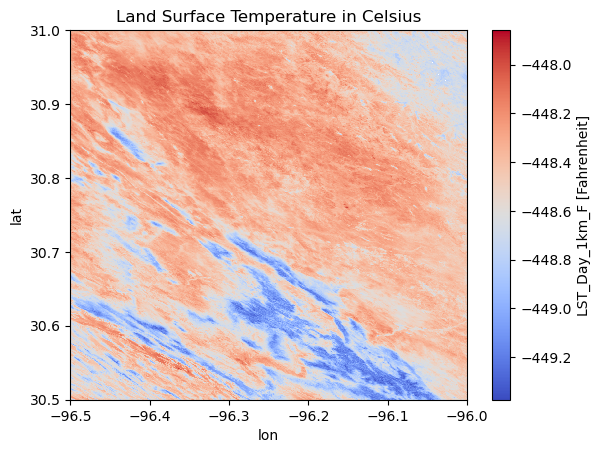

In [107]:
# Inspect the updated dataset
print("Updated Dataset with Coordinates:\n", ds_rural)

# Now you can plot or analyze the dataset using the new coordinates
ds_rural['LST_Day_1km_F'].isel(time=0).plot(x='lon', y='lat', cmap='coolwarm')
plt.title('Land Surface Temperature in Celsius')
plt.show();

In [108]:
%conda install -c conda-forge geopandas rasterio
%conda install -c plotly plotly

Channels:
 - conda-forge
 - plotly
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Channels:
 - plotly
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [109]:
import plotly.express as px

px.scatter_geo?

Signature:
px.scatter_geo(
    data_frame=None,
    lat=None,
    lon=None,
    locations=None,
    locationmode=None,
    geojson=None,
    featureidkey=None,
    color=None,
    text=None,
    symbol=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    size=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    size_max=None,
    projection=None,
    scope=None,
    center=None,
    fitbounds=None,
    basemap_visible=None,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a geographic scatter plot, each row of

In [110]:
# Convert to pandas DataFrame
df_rural = ds_rural['LST_Day_1km_F'].isel(time=0).to_dataframe().reset_index()
df_urban = ds_urban['LST_Day_1km_F'].isel(time=0).to_dataframe().reset_index()
df_rural

group  YDim:MODIS_Grid_8Day_1km_LST  XDim:MODIS_Grid_8Day_1km_LST  \
0        rural                             0                             0   
1        rural                             0                             1   
2        rural                             0                             2   
3        rural                             0                             3   
4        rural                             0                             4   
...        ...                           ...                           ...   
1439995  rural                          1199                          1195   
1439996  rural                          1199                          1196   
1439997  rural                          1199                          1197   
1439998  rural                          1199                          1198   
1439999  rural                          1199                          1199   

          lat        lon  LST_Day_1km_F  
0        30.5 -96.500000     -448.20616  
1        30.5 -96.499583     -448.20040  
2        30.5 -96.499166     -448.23280  
3        30.5 -96.498749     -448.38976  
4        30.5 -96.498332     -448.43368  
...       ...        ...            ...  
1439995  31.0 -96.001668     -448.61296  
1439996  31.0 -96.001251     -448.60864  
1439997  31.0 -96.000834     -448.59640  
1439998  31.0 -96.000417     -448.58344  
1439999  31.0 -96.000000     -448.58272  

[1440000 rows x 6 columns]

In [111]:

df = pd.concat([df_rural, df_urban])
df

group  YDim:MODIS_Grid_8Day_1km_LST  XDim:MODIS_Grid_8Day_1km_LST  \
0        rural                             0                             0   
1        rural                             0                             1   
2        rural                             0                             2   
3        rural                             0                             3   
4        rural                             0                             4   
...        ...                           ...                           ...   
1439995  urban                          1199                          1195   
1439996  urban                          1199                          1196   
1439997  urban                          1199                          1197   
1439998  urban                          1199                          1198   
1439999  urban                          1199                          1199   

          lat        lon  LST_Day_1km_F  
0        30.5 -96.500000     -448.20616  
1        30.5 -96.499583     -448.20040  
2        30.5 -96.499166     -448.23280  
3        30.5 -96.498749     -448.38976  
4        30.5 -96.498332     -448.43368  
...       ...        ...            ...  
1439995  30.0 -95.001668            NaN  
1439996  30.0 -95.001251            NaN  
1439997  30.0 -95.000834            NaN  
1439998  30.0 -95.000417            NaN  
1439999  30.0 -95.000000            NaN  

[2880000 rows x 6 columns]

In [112]:

# Plot using Plotly Express
fig = px.scatter_mapbox(df.sample(n=10_000), lat="lat", lon="lon", color="LST_Day_1km_F",
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title="Land Surface Temperature in Celsius")

fig.show()

In [113]:

# Plot using Plotly Express
fig = px.scatter_mapbox(df.sample(n=10_000), lat="lat", lon="lon", color="LST_Day_1gkm_F",
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title="Land Surface Temperature in Celsius")

fig.show()

### EDA

In [114]:
# ds = xr.concat([ds_rural, ds_urban], dim='time')
# print(ds)

In [115]:
# ds.sel(group='urban')#b
# ds.dims 

In [116]:
print(ds_rural.coords)
ds_urban.coords

Coordinates:
  * group    (group) object 8B 'rural'
    lat      (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 30.5 ... 31.0 31.0
    lon      (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 -96.5 ... -96.0


Coordinates:
  * group    (group) object 8B 'urban'
    lat      (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 29.5 29.5 ... 30.0 30.0
    lon      (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -95.5 -95.5 ... -95.0

In [117]:
# ds.coords.keys() 

## 📌 BOOKMARK EOD 06/28/24: COMBINING THEM AS DS FIRST RUINS COORDINATES!

In [118]:
# df_combined = ds['LST_Day_1km_F'].isel(time=0).to_dataframe().reset_index()
# df_combined

In [119]:

# Plot using Plotly Express
fig = px.scatter_mapbox(#df_combined
                        df.sample(n=100_000), lat="lat", lon="lon", color='group',#"LST_Day_1km_F",
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title="Land Surface Temperature in Celsius")

fig.show()

### Meeting with Chas and Chris continued below

In [120]:
# help(ds.sel(group='urban')['LST_Day_1km'].mean)

In [121]:
# plot_means = ds['LST_Day_1km'].mean(dim='group').mean(dim='time')
# plot_means

NameError: name 'ds' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plot the average LST for urban and rural regions
fig, axes = plt.subplots(figsize=(5,6), nrows=1)
cmap = 'plasma'
plot_means.plot(cmap=cmap, ax=axes)
axes.set(title='Average Land Surface Temperature (Daytime) - Urban Region',
            xlabel='Longitude',ylabel='Latitude')


In [ ]:
plot_means.shape

In [ ]:
plot_vals = ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').values.flatten()
plot_vals

In [ ]:
# Plot the distribution of the LST values
fig, axes=  plt.subplots(nrows=2, figsize=(8,6), sharex=True)


group = 'urban'
plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
sns.histplot(plot_vals[~np.isnan(plot_vals)], bins=100,  ax=axes[0],label=group.title(), color='slateblue')
axes[0].set(title=f'Urban LST Day 1km ({group})',ylabel='Frequency')

group = 'rural'
plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
sns.histplot(plot_vals[~np.isnan(plot_vals)], bins=100, ax=axes[1],label=group.title(), color='salmon')
axes[1].set(title=f'Urban LST Day 1km ({group})', xlabel='Temperature (K)', ylabel='Frequency')
[ax.legend() for ax in axes]
fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr

def plot_lst_distribution(ds, var_name='LST_Day_1km', combined=False, bins=100, kde=True, stat='probability', unit="K"):
    """
    Plots the distribution of Land Surface Temperature (LST) values for urban and rural areas.

    Parameters:
    ds (xarray.Dataset): The dataset containing the LST data.
    var_name (str): The name of the LST variable in the dataset. Default is 'LST_Day_1km'.
    combined (bool): If True, plots both distributions on a single plot. If False, creates separate subplots. Default is False.
    bins (int): Number of bins for the histogram. Default is 100.
    kde (bool): Whether to plot a kernel density estimate. Default is True.
    stat (str): Statistic used to compute the histogram ('count', 'frequency', 'density', or 'probability'). Default is 'probability'.

    Returns:
    None
    """
    
        # Determine the label for the temperature unit
    if unit == 'K':
        temp_label = 'Temperature (K)'
    elif unit == 'C':
        temp_label = 'Temperature (°C)'
    elif unit == 'F':
        temp_label = 'Temperature (°F)'
    else:
        raise ValueError("Unit must be 'K', 'C', or 'F'")



    if combined:
        fig, ax = plt.subplots(nrows=1, figsize=(8, 4), sharex=True)
        axes = [ax]
    else:
        fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

    # Plot params
    groups = ['urban', 'rural']
    colors = ['slateblue', 'salmon']
    shared_kws = {'bins': bins, 'kde': kde, 'stat': stat}

    for i, group in enumerate(groups):
        # Slice the correct group
        plot_vals = ds.sel(group=group)[var_name].mean(dim='time').values.flatten()
        plot_vals = plot_vals[~np.isnan(plot_vals)]
        i_ax = 0 if combined else i
        
        sns.histplot(plot_vals, ax=axes[i_ax], label=group.title(), color=colors[i], **shared_kws)
        axes[i_ax].set(title=f'LST Day 1km ({group.title()})', ylabel='Frequency')
        
        # if group == 'rural':
        
    axes[-1].set(xlabel=temp_label)  # Adjust the unit if needed

    [ax.legend() for ax in axes]
    fig.tight_layout()
    plt.show()
    
    return fig, axes

# Example usage
# Assuming 'combined_ds' is your combined xarray dataset with urban and rural groups
plot_lst_distribution(ds, combined=False, unit='K');  # Separate subplots
# plot_lst_distribution(combined_ds, combined=True)   # Combined plot

In [ ]:
# # Plot the distribution of the LST values
# fig, ax=  plt.subplots(nrows=1, figsize=(8,4), sharex=True)
# axes = [ax]

# shared_kws = {'bins':100, 'kde':True, 'stat':'probability'}
# group = 'urban'
# plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
# sns.histplot(plot_vals[~np.isnan(plot_vals)],  ax=axes[0],label=group.title(), color='slateblue', **shared_kws)
# axes[0].set(title=f'Urban LST Day 1km ({group})',ylabel='Frequency')

# group = 'rural'
# plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
# sns.histplot(plot_vals[~np.isnan(plot_vals)], ax=axes[0],label=group.title(), color='salmon', **shared_kws)
# axes[0].set(title=f'Urban LST Day 1km ({group})', xlabel='Temperature (K)', ylabel='Frequency')
# [ax.legend() for ax in axes]
# fig.tight_layout()


fig, axes = plot_lst_distribution(ds, combined=True, unit="K")  # Separate subplots



In [ ]:
help(ds.sel(group='urban')['LST_Day_1km_F'].mean)

In [ ]:
## Convert temperature to Fahrenheit
# Convert LST temps from Kelvin to Fahrenheit
ds['LST_Day_1km_F'] = (ds['LST_Day_1km'] - 273.15)* 9/5 + 32
ds['LST_Day_1km_C'] = ds['LST_Day_1km'] - 273.15

fig, axes = plot_lst_distribution(ds, var_name="LST_Day_1km_F", combined=True, unit='F')  # Separate subplots
ax = axes[0]


In [ ]:
mean_temp

In [ ]:

mean_temp_urban = ds.sel(group='urban')['LST_Day_1km_F'].mean(dim='time', skipna=True).values.flatten().mean()
mean_temp_urban


In [ ]:

mean_temp_rural = ds.sel(group='rural')['LST_Day_1km_F'].mean(dim='time', skipna=True).values.flatten().mean()
mean_temp_rural

In [ ]:

ax.axvline(mean_temp_urban, color='black', linestyle='--', label=f'Urban Mean: {mean_temp_urban:.2f}°F')
ax.axvline(mean_temp_rural, color='orange', linestyle='--', label=f'Rural Mean: {mean_temp_rural:.2f}°F')
ax.legend()
fig

In [ ]:
import matplotlib.pyplot as plt

# Plot the average LST for urban and rural regions
fig, axes = plt.subplots(figsize=(10, 12), nrows=2)
cmap = 'plasma'
ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').plot(cmap=cmap, ax=axes[0])
axes[0].set(title='Average Land Surface Temperature (Daytime) - Urban Region',
            xlabel='Longitude',ylabel='Latitude')

# plt.figure(figsize=(10, 6))
ds.sel(group='rural')['LST_Day_1km'].mean(dim='time').plot(cmap=cmap, ax=axes[1])
axes[1].set(title='Average Land Surface Temperature (Daytime) - Rural Region',
            xlabel='Longitude',ylabel='Latitude');


### Attempting to Match Coorindates to Map

In [ ]:
# # Display the dataset's structure
# # print(f"{ds=}")

# # Display the variables and dimensions in the dataset
# print(f"{ds.variables=}")

# # Display the dimensions of the dataset
# print(f"{ds.dims=}")

# # Display the coordinates of the dataset
# print(f'{ds.coords=}')

### Interpreting Data Variables in the MODIS LST Dataset



The dataset you have contains several variables. Here's a detailed interpretation of each:

#### Dimensions
- **time**: The temporal dimension, representing different time points (26 time steps in this dataset).
- **YDim:MODIS_Grid_8Day_1km_LST**: The vertical spatial dimension (1200 grid cells).
- **XDim:MODIS_Grid_8Day_1km_LST**: The horizontal spatial dimension (1200 grid cells).

#### Data Variables

1. **LST_Day_1km**:
   - **Description**: Land Surface Temperature during the day.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Unit**: Kelvin (but typically scaled and should be converted to Celsius).
   - **Size**: 300MB
   - **Meaning**: This variable provides the daytime land surface temperature for each grid cell over the specified time period.

2. **QC_Day**:
   - **Description**: Quality Control for daytime LST data.
   - **Type**: float32
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 150MB
   - **Meaning**: This variable contains quality assurance information for the daytime LST data, indicating the reliability and accuracy of the measurements.

3. **Day_view_time**:
   - **Description**: Local time of day (in hours) at which the daytime LST was measured.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable indicates the local solar time when the LST measurement was taken.

4. **Day_view_angl**:
   - **Description**: View zenith angle for daytime observations.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable represents the angle at which the MODIS sensor viewed the surface during the daytime LST measurement.

5. **LST_Night_1km**:
   - **Description**: Land Surface Temperature during the night.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Unit**: Kelvin (but typically scaled and should be converted to Celsius).
   - **Size**: 300MB
   - **Meaning**: This variable provides the nighttime land surface temperature for each grid cell over the specified time period.

6. **QC_Night**:
   - **Description**: Quality Control for nighttime LST data.
   - **Type**: float32
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 150MB
   - **Meaning**: This variable contains quality assurance information for the nighttime LST data, indicating the reliability and accuracy of the measurements.

7. **Night_view_time**:
   - **Description**: Local time of night (in hours) at which the nighttime LST was measured.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable indicates the local solar time when the LST measurement was taken.

8. **Night_view_angl**:
   - **Description**: View zenith angle for nighttime observations.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable represents the angle at which the MODIS sensor viewed the surface during the nighttime LST measurement.

9. **Emis_31**:
   - **Description**: Band 31 emissivity.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable provides the surface emissivity for MODIS Band 31, which is used in the LST retrieval process.

10. **Emis_32**:
    - **Description**: Band 32 emissivity.
    - **Type**: float64
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 300MB
    - **Meaning**: This variable provides the surface emissivity for MODIS Band 32, which is used in the LST retrieval process.

11. **Clear_sky_days**:
    - **Description**: Number of clear-sky days used in the LST calculation.
    - **Type**: float32
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 150MB
    - **Meaning**: This variable indicates the number of clear-sky days that contributed to the 8-day LST composite for each grid cell.

12. **Clear_sky_nights**:
    - **Description**: Number of clear-sky nights used in the LST calculation.
    - **Type**: float32
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 150MB
    - **Meaning**: This variable indicates the number of clear-sky nights that contributed to the 8-day LST composite for each grid cell.



#### Attributes

1. **HDFEOSVersion**: The version of the HDF-EOS (Hierarchical Data Format - Earth Observing System) used.
2. **StructMetadata.0**: Metadata describing the structure of the dataset.
3. **identifier_product_doi**: DOI (Digital Object Identifier) for the product.
4. **identifier_product_doi_authority**: The authority providing the DOI.
5. **CoreMetadata.0**: Core metadata including information about the dataset's content and purpose.
6. **ArchiveMetadata.0**: Metadata related to the archival and provenance of the data.


### Bookmark: Lunch


### Next Steps for Analysis

1. **Data Cleaning**:
   - Handle any missing or invalid data.
   - Apply quality control filters using `QC_Day` and `QC_Night` variables to ensure data reliability.

2. **Data Transformation**:
   - Convert LST values from Kelvin to Celsius using the scaling factor (typically `LST = LST * 0.02 - 273.15`).

3. **Descriptive Analysis**:
   - Calculate summary statistics (mean, median, standard deviation) for LST Day and Night.
   - Plot spatial distributions and temporal trends.

4. **Comparative Analysis**:
   - Compare LST between urban and rural areas.
   - Analyze temporal changes in LST to understand trends and anomalies.

5. **Advanced Analysis**:
   - Use machine learning models to predict LST based on other variables (e.g., emissivity, view angle).
   - Conduct spatial analysis to identify UHI hotspots.

By following these steps and understanding the variables, you can effectively analyze the MODIS LST dataset to study Urban Heat Island effects and other temperature-related phenomena.

### ✅ TO DO: Get Socioeconomic data that can be matched to the regions


### 3. Data Preparation



**Data Cleaning:**
- Handle missing values in LST and socio-economic datasets.
- Normalize and standardize data for consistency.

**Data Transformation:**
- Convert geographic boundaries to a common coordinate system.
- Calculate average temperatures for urban and rural areas.

**Feature Engineering:**
- Create new features such as temperature difference (urban vs. rural).
- Aggregate socio-economic indicators for analysis.

**Data Integration:**
- Merge LST data with socio-economic data based on geographic coordinates.


In [ ]:
#1. Initial Data Exploration
# Summary statistics
urban_temps = ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').values.flatten()
rural_temps = ds.sel(group='rural')['LST_Day_1km'].mean(dim='time').values.flatten()

# Removing NaNs
urban_temps = urban_temps[~np.isnan(urban_temps)]
rural_temps = rural_temps[~np.isnan(rural_temps)]

# Summary statistics
urban_summary = {
    'mean': np.mean(urban_temps),
    'median': np.median(urban_temps),
    'std_dev': np.std(urban_temps)
}

rural_summary = {
    'mean': np.mean(rural_temps),
    'median': np.median(rural_temps),
    'std_dev': np.std(rural_temps)
}

print("Urban Summary:", urban_summary)
print("Rural Summary:", rural_summary)

In [ ]:
ds['time']

In [ ]:
# 2. Temporal Analysis
import matplotlib.dates as mdates

unit  = "F"
# Convert time dimension to a datetime format
ds['datetime'] = pd.to_datetime(ds['time'].values,   origin='1970-01-01')#unit='D',


In [ ]:
ds.sel(group='urban')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(label='Urban')


In [ ]:
# Plot time series
fig, ax = plt.subplots(figsize=(12, 6))
ds.sel(group='urban')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(ax=ax, label='Urban')
ds.sel(group='rural')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(ax=ax, label='Rural')

# Formatting the plot
ax.set_title('Mean Land Surface Temperature Over Time')
ax.set_xlabel('Date')
ax.set_ylabel(f'Temperature ({unit})')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend()
plt.show()


### 4. Modeling



**Model Selection:**
- Choose appropriate statistical and machine learning models (e.g., regression analysis, clustering).

**Training and Testing:**
- Split data into training and testing sets.
- Train models to identify key factors contributing to UHI.

**Model Evaluation:**
- Use metrics such as R-squared, Mean Absolute Error (MAE) to evaluate model performance.
- Validate models using cross-validation techniques.



### 5. Evaluation



**Model Performance:**
- Assess the performance of models on test data.
- Refine models based on evaluation metrics and feedback.

**Insights and Interpretation:**
- Interpret the results to identify significant factors influencing UHI.
- Visualize the findings using heatmaps and charts.

**Review Objectives:**
- Ensure the project goals are met.
- Validate findings with domain experts.



### 6. Deployment



**Reporting:**
- Prepare a comprehensive report detailing the findings, methodology, and recommendations.
- Create visualizations and interactive dashboards for stakeholders.

**Actionable Insights:**
- Propose mitigation strategies such as increasing green spaces or implementing reflective materials.
- Suggest policy changes based on data-driven insights.

**Dissemination:**
- Share findings with city planners, environmental agencies, and the public.
- Publish results in relevant journals or online platforms.

**Maintenance and Monitoring:**
- Set up periodic monitoring of UHI using updated data.
- Refine models and strategies based on new data and feedback.



### Timeline and Milestones

1. **Weeks 1-2: Business Understanding**
   - Define objectives, goals, and project plan.

2. **Weeks 3-4: Data Understanding**
   - Collect and explore data, assess quality.

3. **Weeks 5-7: Data Preparation**
   - Clean, transform, and integrate data.

4. **Weeks 8-10: Modeling**
   - Train, test, and evaluate models.

5. **Weeks 11-12: Evaluation**
   - Interpret results, validate with experts.

6. **Weeks 13-14: Deployment**
   - Prepare reports, visualizations, and share findings.

This plan outlines a structured approach to the Urban Heat Island Analysis project, ensuring each phase is thoroughly addressed to achieve the project objectives.